In [1]:
pip install numpy 

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import itertools
import math

# Problem statement

We’ve invited representatives from our neighboring islands to join us for the celebratory Archipelago Trade-Off. You can trade Snowballs with Pam the Penguin from the north, Pizza’s with Devin the Duck from the south, and Silicon Nuggets with Benny the Bull from the west archipelago.

Your objective is to trade these currencies and maximize your profit in SeaShells. The number of trades is limited to 5. You must begin your first trade and end your last trade with our own currency; SeaShells. Use the trading table to develop your trading strategy, and use the drop down fields to translate your strategy into actionable input. Once you are satisfied with your strategy and input, use the ‘Submit manual trade’ button to lock it in.

Note that you can (re)submit new strategies as long as the round is still in progress. As soon as the round ends, the trading strategy that was submitted last will be processed.

What a great day to meet with some old friends, make some new ones, and of course, make some profit!

# Solution

The state space has size $1+4+4^2+4^3+4^4 = 341$. It is small enough that optimal solutions can be found via bruteforce.

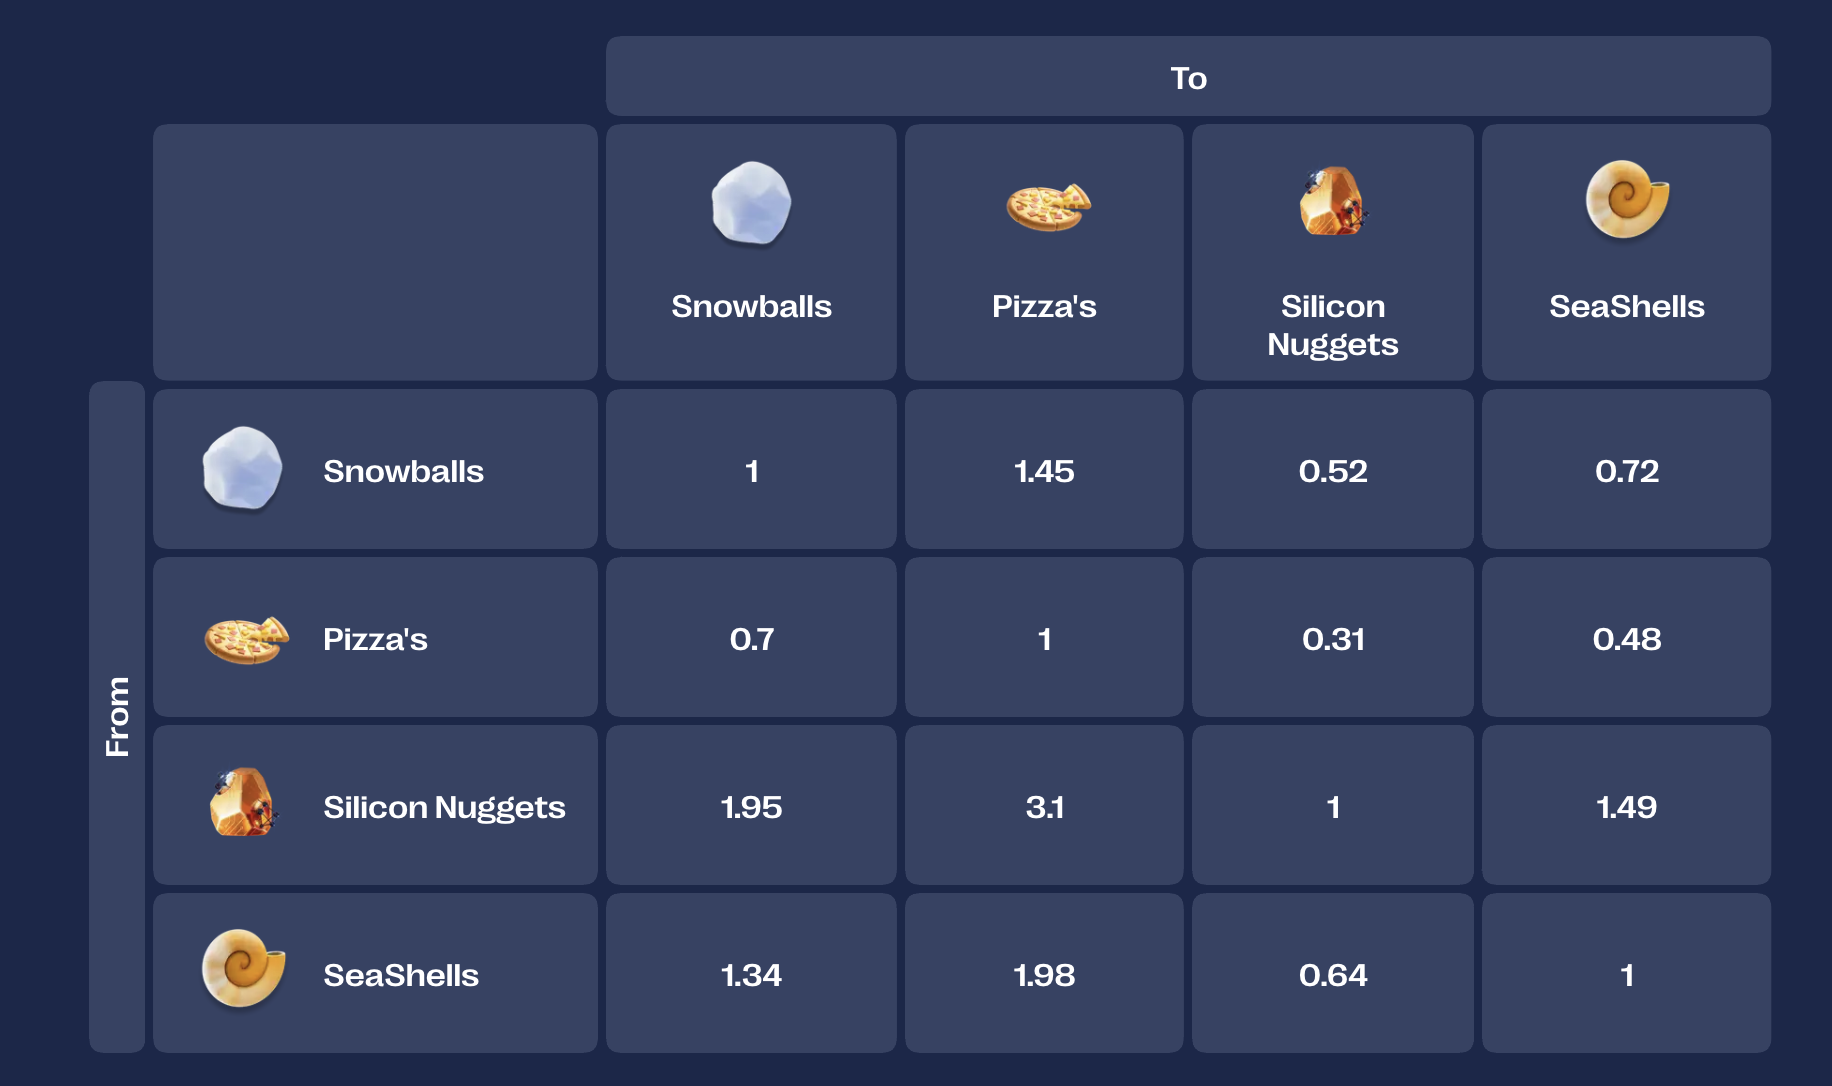

In [3]:
rates = np.array([[1, 0.64, 1.98, 1.34],
                  [1.49, 1, 3.1, 1.95],
                  [0.48, 0.31, 1, 0.7],
                  [0.72, 0.52, 1.45, 1]
                 ])
products = {0:'Shells', 1:'Nuggets', 2:'Pizzas', 3:'Snowballs'}

In [25]:
def amount(seq):
    """Compute the final amount after a sequence of trades, starting with 1 SeaShell.

    Parameters
    ----------
    seq : list of int
        List of intermediate products traded.
    
    Returns
    -------
    float
        Payoff.
    """
    if not seq:
        return 1
    prod = rates[0, seq[0]] * rates[seq[-1], 0]
    L = len(seq)
    for i in range(L-1):
        prod *= rates[seq[i], seq[i+1]]
    return prod

In [26]:
def maximize(L):
    """Among sequences of L intermediate products, compute the ones with greatest final amount.

    Parameters
    ----------
    L : int
        Number of intermediate products.
    
    Returns
    -------
    argmax : list of tuple
        Optimal sequences of intermediate trades.
    max_val : float
        Maximal final amount for L intermediate products.
    """
    seqs = itertools.product(*[range(0, 4) for _ in range(L)])
    max_val = float('-inf')
    argmax = []
    for seq in seqs:
        p = amount(seq)
        if math.isclose(p, max_val):
            argmax.append(seq)
        elif p > max_val:
            max_val = p
            argmax = [seq]
    return (argmax, max_val)

In [27]:
for L in range(0,5):
    print(maximize(L))

([()], 1)
([(0,)], np.float64(1.0))
([(3, 1)], np.float64(1.038232))
([(2, 3, 1)], np.float64(1.0738728))
([(3, 1, 2, 3)], np.float64(1.0886803200000001))


It is therefore optimal to proceed with 4 intermediate products (5 trades in total).  
Since the initial capital was $1$ SeaShell, `max_val - 1` is the rate of return. Thus the maximal return is $\approx 8.9\%$.

In [9]:
argmax, _ = maximize(4)
print("Optimal sequences of trades:")
for seq in argmax:
    res = ' -> '.join([products[0]] + [products[i] for i in seq] + [products[0]])
    print(res)

Optimal sequences of trades:
Shells -> Snowballs -> Nuggets -> Pizzas -> Snowballs -> Shells
